In [324]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt 

In [325]:
# Import sklearn libraries
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale

In [326]:
''' Import cleaned housing data for Kings County, WA. '''
houseClean = pd.read_csv("./data/Modified/houseClean_dates.csv", index_col=False)
houseClean.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,quarter
0,0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,4
1,1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,4
2,2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1
3,3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,4
4,4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1


In [327]:
df = houseClean[['bedrooms','sqft_living','grade','price']]
df.head()

,bedrooms,sqft_living,grade,price
0,3.0,1180.0,7,221900.0
1,3.0,2570.0,7,538000.0
2,2.0,770.0,6,180000.0
3,4.0,1960.0,7,604000.0
4,3.0,1680.0,8,510000.0


In [328]:
''' Define Dependent and Independent Variables '''
X = df.iloc[:,:3]
y = df.iloc[:,-1]
print(X.shape, y.shape)

(21613, 3) (21613,)


In [329]:
''' Create Training and Test sets with a 70-30 split '''
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15129, 3) (6484, 3) (15129,) (6484,)


In [330]:
# y_train

In [331]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X_train)

In [332]:
def cost_function(X, y, theta):
    m = len(y)
    theta_j = np.sum((X.dot(theta) - y) ** 2)/(2 * m)
    return theta_j

In [333]:
def batch_gradient_descent(X, y, theta, eta, iterations):
    cost_history = [0] * iterations
    m = len(y)
 
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(theta)
        # Difference b/w Hypothesis and Actual Y
        loss = h - y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of theta using Gradient
        theta = theta - (eta * gradient)
        # New Cost Value
        cost = cost_function(X, y, theta)
        cost_history[iteration] = cost
 
    return theta, cost_history

In [334]:
''' Feature Scaling for Training Set '''
m = len(X_train)
f = 3
X_train = X[:m,:f]
X_train = np.c_[np.ones(len(X_train),dtype="int64"), X_train]
y_train = y[:m]
X_test = X[m:,:f]
X_test = np.c_[np.ones(len(X_test),dtype="int64"), X_test]
y_test = y[m:]

In [335]:
''' Observe training set with bias added to input vector '''
print(f"{X_train.shape}, \n {X_train}")

(15129, 4), 
 [[ 1.          0.67689911  0.66517989  1.14761535]
 [ 1.          0.67689911  0.29223284 -0.55665681]
 [ 1.          0.67689911  0.12769738  0.29547927]
 ...
 [ 1.         -0.41220082  0.05091417 -0.55665681]
 [ 1.         -2.59040068 -1.85769717 -2.26092897]
 [ 1.          0.67689911  1.15878627 -0.55665681]]


In [336]:
y_train

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
15124    555700.0
15125    690000.0
15126    449000.0
15127    308500.0
15128    340000.0
Name: price, Length: 15129, dtype: float64

In [337]:
# Initial Coefficients
theta = np.zeros(X_train.shape[1])
eta = 0.02
n_iters = 1000
new_theta, cost_history = batch_gradient_descent(X_train, y_train, theta, eta, n_iters)

In [338]:
''' Resultant Theta vector '''
print(f"Shape: {new_theta.shape}, \u03B8: {new_theta}")

Shape: (4,), θ: [ 5.32553143e+05  7.30788817e+03 -5.06911741e+03 -4.14369476e+02]


In [339]:
eta = 0.03
new_theta_1, cost_hist_1 = batch_gradient_descent(X_train, y_train, theta, eta, n_iters)

Text(0, 0.5, 'Mean Squared Error')

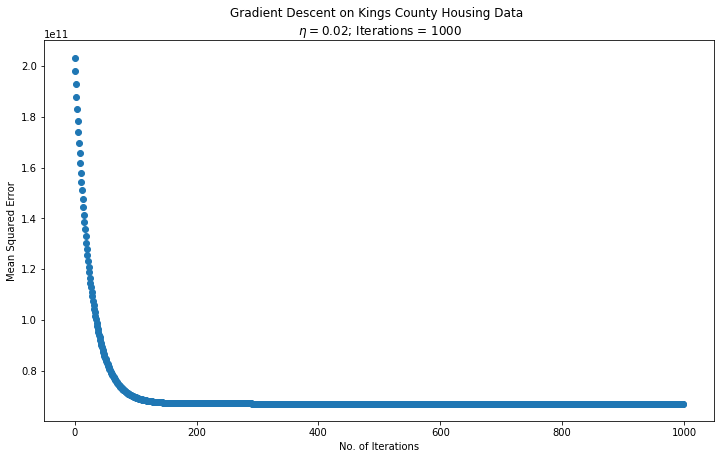

In [340]:
iter_list = [i for i in range(0, iter_)]
plt.scatter(iter_list, cost_history)
plt.title('Gradient Descent on Kings County Housing Data \n $\eta = {0.02}$; Iterations = 1000')
plt.xlabel('No. of Iterations')
plt.ylabel('Mean Squared Error')

Text(0, 0.5, 'Mean Squared Error')

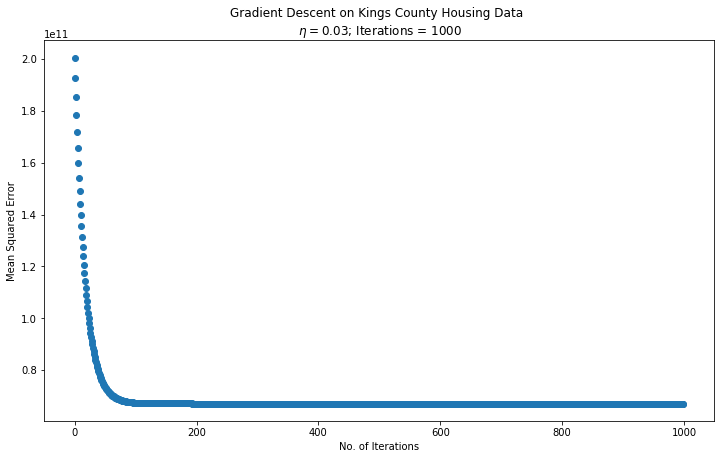

In [341]:
iter_list = [i for i in range(0, iter_)]
plt.scatter(iter_list, cost_hist_1)
plt.title('Gradient Descent on Kings County Housing Data \n $\eta = {0.03}$; Iterations = 1000')
plt.xlabel('No. of Iterations')
plt.ylabel('Mean Squared Error')

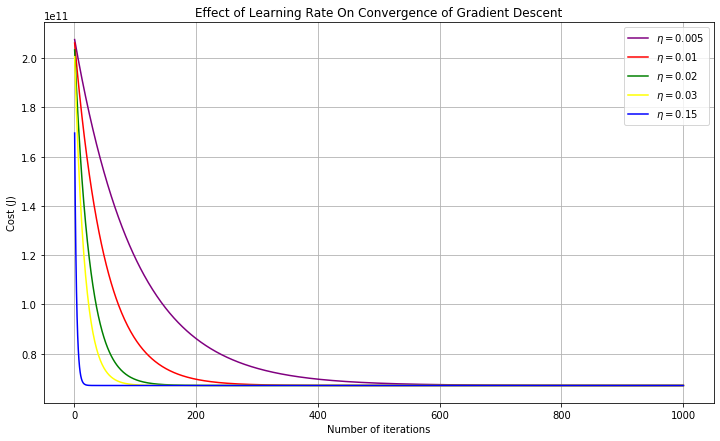

In [342]:
''' Plot Learning Rates '''
n_iters = 1000
theta = np.zeros(X_train.shape[1])

eta = 0.005;
theta_1, cost_history_1 = batch_gradient_descent(X_train, y_train, theta, eta, n_iters)

eta = 0.01;
theta_2, cost_history_2 = batch_gradient_descent(X_train, y_train, theta, eta, n_iters)

eta = 0.02;
theta_3, cost_history_3 = batch_gradient_descent(X_train, y_train, theta, eta, n_iters)

eta = 0.03;
theta_4, cost_history_4 = batch_gradient_descent(X_train, y_train, theta, eta, n_iters)

eta = 0.15;
theta_5, cost_history_5 = batch_gradient_descent(X_train, y_train, theta, eta, n_iters)

plt.plot(range(1, n_iters +1), cost_history_1, color ='purple', label = '$\eta = {0.005}$')
plt.plot(range(1, n_iters +1), cost_history_2, color ='red', label = '$\eta = {0.01}$')
plt.plot(range(1, n_iters +1), cost_history_3, color ='green', label = '$\eta = {0.02}$')
plt.plot(range(1, n_iters +1), cost_history_4, color ='yellow', label = '$\eta = {0.03}$')
plt.plot(range(1, n_iters +1), cost_history_5, color ='blue', label = '$\eta = {0.15}$')

plt.rcParams["figure.figsize"] = (12,7)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("Cost (J)")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend()
plt.savefig('./Visualizations/BGD_LearningRates.png')

### Performance Metrics

In [356]:
''' Transform input variables from dataframe to array object '''
X = houseClean[['bedrooms','sqft_living','grade']]

''' Add bias column to input vector '''
X = np.concatenate((np.ones((len(X), 1)), X), axis=1)

''' Feature Scaling for Full Set '''
min_x = np.min(X[:, 1:])
max_x = np.max(X[:, 1:])
X_normal[:, 1:] = (X[:, 1:] - min_x)/(max_x - min_x)
X_normal[:10, :]

array([[1.00000000e+00, 2.21565731e-04, 8.71491876e-02, 5.16986706e-04],
       [1.00000000e+00, 2.21565731e-04, 1.89807976e-01, 5.16986706e-04],
       [1.00000000e+00, 1.47710487e-04, 5.68685377e-02, 4.43131462e-04],
       [1.00000000e+00, 2.95420975e-04, 1.44756278e-01, 5.16986706e-04],
       [1.00000000e+00, 2.21565731e-04, 1.24076809e-01, 5.90841950e-04],
       [1.00000000e+00, 2.95420975e-04, 4.00295421e-01, 8.12407681e-04],
       [1.00000000e+00, 2.21565731e-04, 1.26661743e-01, 5.16986706e-04],
       [1.00000000e+00, 2.21565731e-04, 7.82865583e-02, 5.16986706e-04],
       [1.00000000e+00, 2.21565731e-04, 1.31462334e-01, 5.16986706e-04],
       [1.00000000e+00, 2.21565731e-04, 1.39586411e-01, 5.16986706e-04]])

In [357]:
''' Transform output variable from dataframe to array object '''
y = df['price'].values.reshape(-1,1)

''' Feature Scaling for Output variable'''
max_y = np.max(y)
min_y = np.min(y)
y_normal = (y - min_y)/(max_y - min_y) 
y_normal[:10, 0]

array([0.01926557, 0.06072131, 0.01377049, 0.06937705, 0.05704918,
       0.15081967, 0.02393443, 0.02843934, 0.0202623 , 0.03252459])

In [371]:
''' Perform predictions on training set'''
# y_predict = X_normal.dot(theta_5)
# ypred = y_predict*(max_x - min_y) + min_y

# y_norm_sort = np.argsort(y_normal[:, 0])
# plt.plot(y[y_norm_sort, 0], 'o', color="cyan")
# plt.plot(ypred[y_norm_sort, 0], '--')

' Perform predictions on training set'

In [372]:
def predict(x, theta):
    xnorm = (x - min_x)/(max_x - min_x)
    y_predict = X_normal.dot(theta)
    ypred = y_predict*(max_x - min_y) + min_y
    return ypred

In [384]:
from scipy.stats import pearsonr
r2 = pearsonr(ypred.reshape(-1), y_normal.reshape(-1))
print(f"R^2 Value: {r2}")

R^2 Value: (0.7021777673989331, 0.0)


In [374]:
x = np.array([1,3,2500,6])

predict(X, theta_5)

array([-3.27031007e+10, -3.26705541e+10, -3.27126691e+10, ...,
       -3.27068138e+10, -3.26932649e+10, -3.27068138e+10])

In [377]:
''' Resultant Theta vector for $\eta$ = 0.15 '''
print(f"Shape: {theta_5.shape}, \u03B8: {theta_5}")

Shape: (4,), θ: [ 5.32553144e+05  7.34044142e+03 -5.15843165e+03 -3.44360417e+02]


In [ ]:
normalize_test_data = ((np.array([1650, 3]) - mu) / sigma)
normalize_test_data = np.hstack((np.ones(1), normalize_test_data))
price = normalize_test_data.dot(theta)
print('Predicted price of a 1650 sq-ft, 3 br house:', price)